In [1]:
import sys
sys.path.append('../')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from machinelearning.mlpipeline import MLPipelines
from dataloader.eda import DataExplorer

%load_ext autoreload
%autoreload 2

In [2]:
csv_dir = "../data/ST000369.csv"
label = "Class"

##### Perform Data Exploration using `DataExplorer` 

Use `DataExplorer` class to perform an Explanatory Data Analysis on a metabolomics dataset

Label mapping: {0: 0.0, 1: 1.0}
Normalization completed.


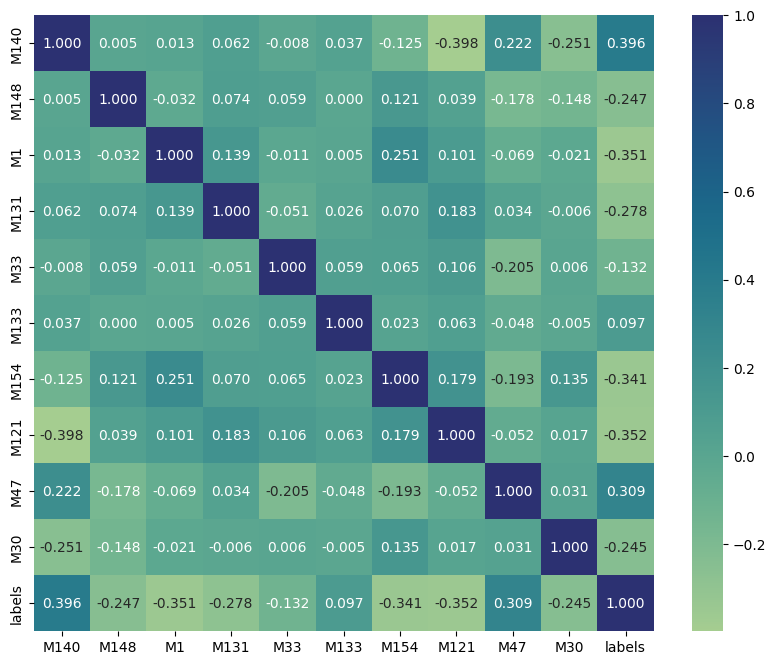

In [3]:
explorer = DataExplorer(csv_dir=csv_dir, label=label)
explorer.correlations(get_table=False, num_of_best_features=10)

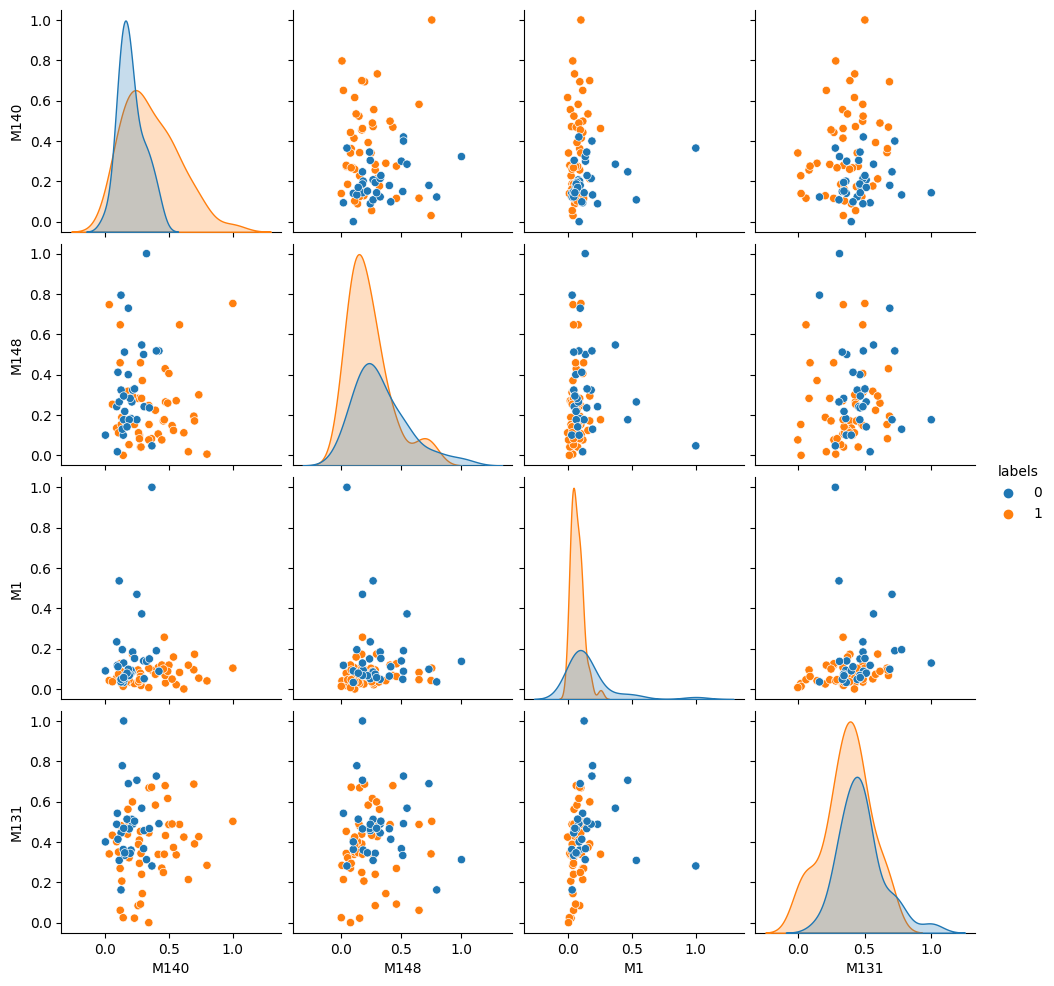

In [4]:
explorer.pairplots_function(num_of_best_features=4)

##### Load data and initialize `MLPipelines` 

Use `MLPipelines` class to load a metabolomics dataset for further analysis

In [5]:
mlpipe = MLPipelines(label=label, csv_dir=csv_dir)
print(mlpipe)

Label mapping: {0: 0.0, 1: 1.0}
There is no selected classifier.
Number of rows: 80 
Number of columns: 182


Perform model selection using **Nested Cross Validation**

Your Dataset contains NaN values. Some estimators may not work with NaN values.


Outer fold of 1 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 1 round: 33% |████▎        | Elapsed Time: 0:00:05 ETA:   0:00:11
Outer fold of 1 round: 66% |████████▋    | Elapsed Time: 0:00:11 ETA:   0:00:05
Outer fold of 1 round:100% |█████████████| Elapsed Time: 0:00:12 Time:  0:00:12


Finished with 1 round after 0.00 hours.
Finished with 6 estimators


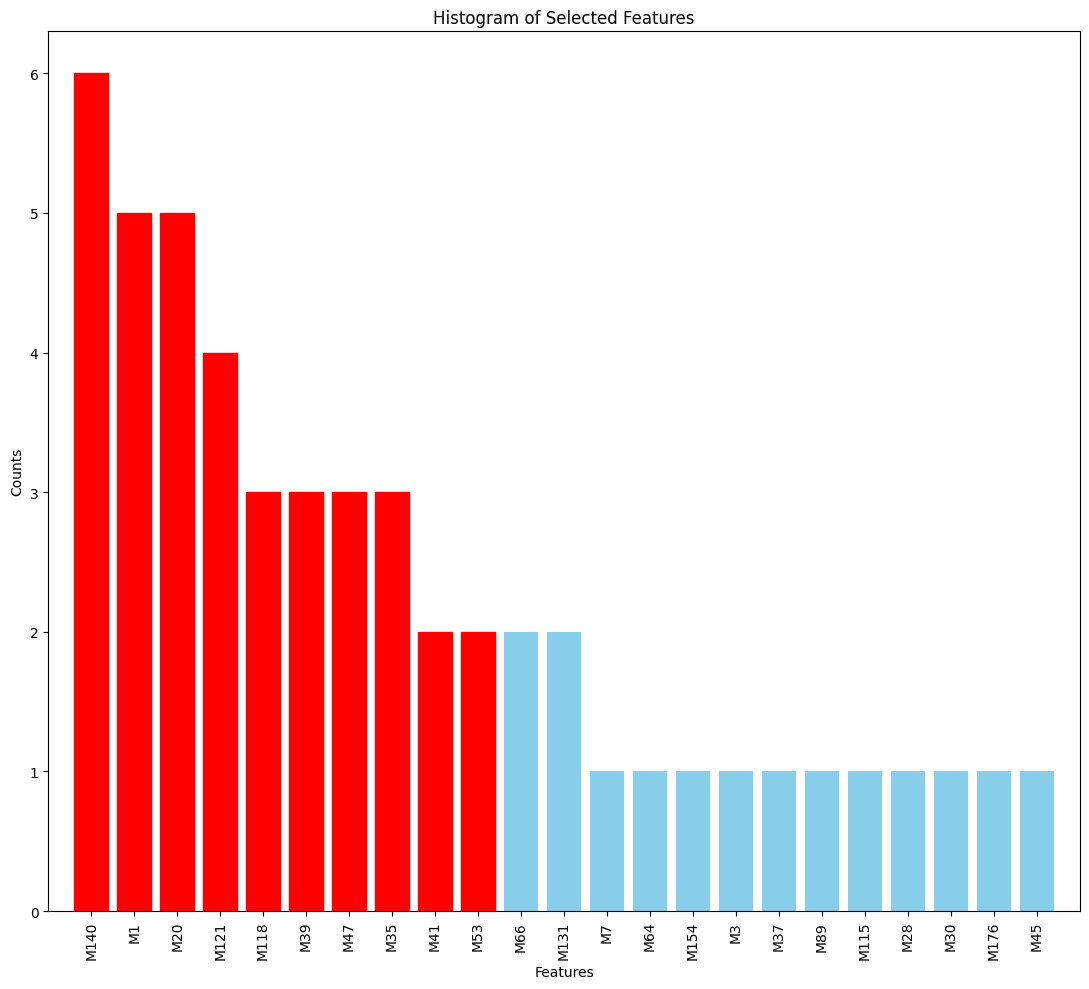

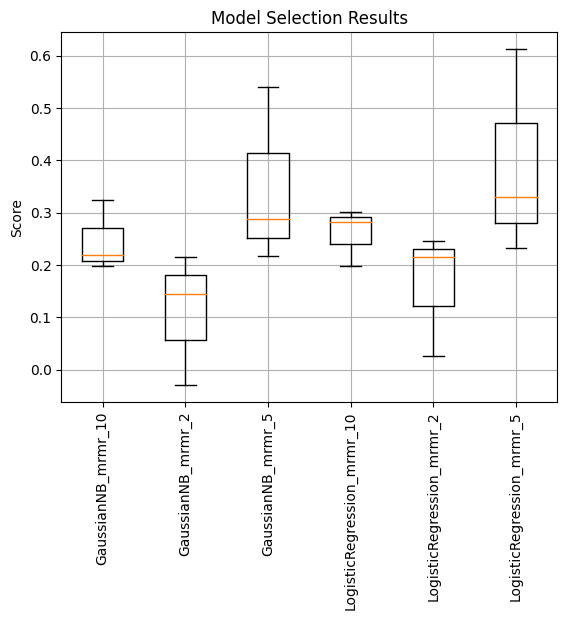

In [6]:
scores, features_list, all_featues = mlpipe.model_selection(include=[LogisticRegression(), GaussianNB()], inner_splits=3, outer_splits=3, rounds=1, num_features=[2,5,10])

Train the final classifier using __Randomized Search__, __Grid Search__ or __Bayesian Search__.

In [7]:
mlpipe.normalize()

# Create a parameter grid for XGBoost classifier
param_grid = {
    'n_estimators': [3],
    'max_depth': [3],
}

print('Training with RandomizedSearchCV:')
mlpipe.random_search(estimator=XGBClassifier(), parameter_grid=param_grid)

# print('Training with GridSearchCV:')
# mlpipe.grid_search(estimator=XGBClassifier(), parameter_grid=param_grid)

# print('Training with Bayesian Search using Optuna:')
# mlpipe.bayesian_search(n_trials=3)

Converting the raw data with minmax normalization method....
Normalization completed.
Estimator: XGBClassifier
Best parameters: {'n_estimators': 3, 'max_depth': 3}
Best matthews_corrcoef: 0.053251068776139256


Perform _model validation_ using __Bootstrap validation__

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


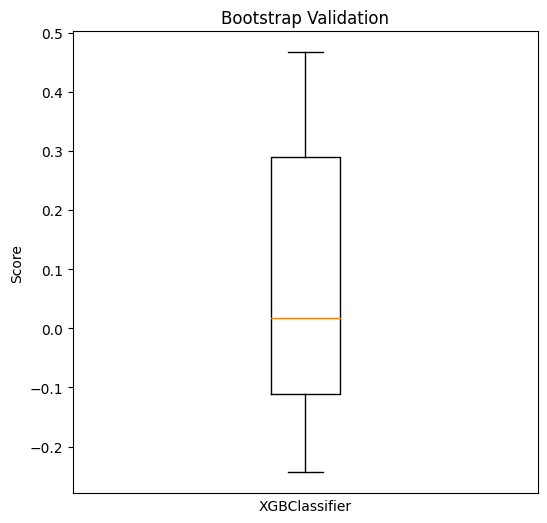

In [8]:
boot_scores = mlpipe.bootstrap_validation(n_iter=10)